In [1]:
import pandas as pd

stock_df = pd.read_csv("Data/yfinance_data/AAPL.csv", parse_dates=["Date"])
stock_df.set_index("Date", inplace=True)

news_df = pd.read_csv("Data/newsData/processed_analyst_ratings.csv", parse_dates=["date"])
news_df.set_index("date", inplace=True)

print(stock_df.head())
print(news_df.head())


               Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800
                                                                    headline  \
date                                                                           
2020-06-05 10:30:54-04:00            Stocks That Hit 52-Week Highs On Friday   
2020-06-03 10:45:20-04:00         Stocks That Hit 52-Week Highs On Wednesday   
2020-05-26 04:30:07-04:00                      71 Biggest Movers From Friday   
2020-05-22 12:45:06-04:00       46 Stocks Moving In Friday's Mid-Day Session   
2020-05-22 11:38:59-04:00  B of A Securities Maintains Neutral on Agilent...   

In [4]:
news_df = news_df.reset_index()  
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', utc=False).dt.normalize()

stock_df = stock_df.reset_index()
stock_df['Date'] = pd.to_datetime(stock_df['Date'], errors='coerce', utc=False).dt.normalize()

print(news_df.head())
print(stock_df.head())


   level_0  index                      date  \
0        0      0 2020-06-05 00:00:00-04:00   
1        1      1 2020-06-03 00:00:00-04:00   
2        2      2 2020-05-26 00:00:00-04:00   
3        3      3 2020-05-22 00:00:00-04:00   
4        4      4 2020-05-22 00:00:00-04:00   

                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher stock  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights     A   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights     A   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin     A   
3  https://www.benzinga.com/news/20/05/16095921/4...    

In [5]:
daily_sentiment = news_df.groupby(news_df['date'].dt.date)['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date': 'Date', 'sentiment': 'avg_sentiment'}, inplace=True)

print(daily_sentiment.head())


         Date  avg_sentiment
0  2011-04-27        0.00000
1  2011-04-28        0.12500
2  2011-04-29        0.36755
3  2011-04-30        0.20230
4  2011-05-01        0.00000


In [7]:
stock_df['daily_return'] = stock_df['Close'].pct_change()

stock_df = stock_df.dropna(subset=['daily_return'])

print(stock_df[['Date', 'Close', 'daily_return']].head())


        Date     Close  daily_return
2 2009-01-06  2.789767     -0.016494
3 2009-01-07  2.729484     -0.021609
4 2009-01-08  2.780169      0.018570
5 2009-01-09  2.716589     -0.022869
6 2009-01-12  2.659007     -0.021196


In [11]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])

merged_df = pd.merge(stock_df, daily_sentiment, on='Date', how='inner')

print(merged_df.head())


   index       Date      Close       High        Low       Open      Volume  \
0    583 2011-04-27  10.501366  10.567347  10.409894  10.564047   356213200   
1    584 2011-04-28  10.399394  10.489366  10.362505  10.382599   360959200   
2    585 2011-04-29  10.500770  10.615335  10.397000  10.400299  1006345200   
3    586 2011-05-02  10.385298  10.510960  10.361905  10.489067   442713600   
4    587 2011-05-03  10.442881  10.493565  10.365504  10.436583   313348000   

   daily_return  avg_sentiment  
0     -0.000770       0.000000  
1     -0.009710       0.125000  
2      0.009748       0.367550  
3     -0.010997       0.136444  
4      0.005545       0.000000  


In [13]:
correlation = merged_df['daily_return'].corr(merged_df['avg_sentiment'])
print("Pearson correlation:", correlation)


Pearson correlation: 0.04927454846418337


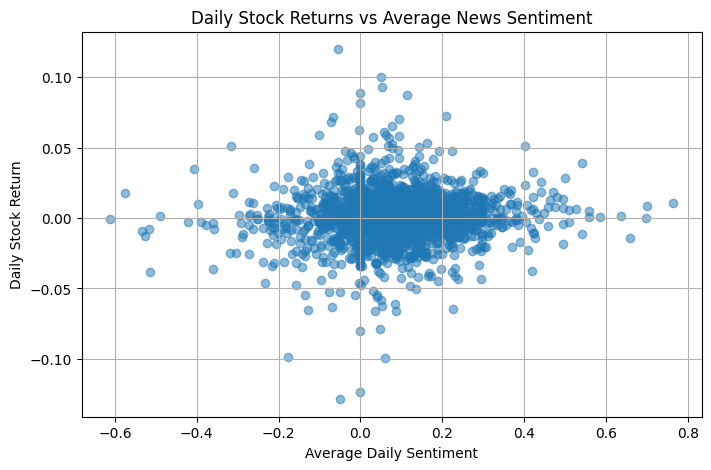

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(merged_df['avg_sentiment'], merged_df['daily_return'], alpha=0.5)
plt.title('Daily Stock Returns vs Average News Sentiment')
plt.xlabel('Average Daily Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show()

In [15]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(merged_df['avg_sentiment'], merged_df['daily_return'])
print(f"Pearson correlation: {corr}")
print(f"P-value: {p_value}") 

merged_df.to_csv("Data/merged_stock_news.csv", index=False)
print("Merged dataset saved as 'merged_stock_news.csv'.")


Pearson correlation: 0.049274548464183374
P-value: 0.020077067540041328
Merged dataset saved as 'merged_stock_news.csv'.
